In [58]:
import sys
# !{sys.executable} -m pip install pyvis
# !{sys.executable} -m pip install datashader
!{sys.executable} -m pip install lmfit


  Using cached lmfit-1.0.3.tar.gz (292 kB)
  Using cached asteval-0.9.26.tar.gz (40 kB)
  Using cached uncertainties-3.1.6-py2.py3-none-any.whl (98 kB)
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84398 sha256=ccfd1d33e3e7c72e86a62088f558f2a0c29b3e18af7cea0b225d11950164c291
  Stored in directory: c:\users\kgulp\appdata\local\pip\cache\wheels\d9\b3\6d\1b2ed3dd9940363505d3cdc5a572a3d1622a7976756cc90d1c
  Created wheel for asteval: filename=asteval-0.9.26-py3-none-any.whl size=17641 sha256=88c1afecdae8c52ba1935486e51b33df16bd7b9311825a6c276b0913a0e960a6
  Stored in directory: c:\users\kgulp\appdata\local\pip\cache\wheels\47\4c\d9\c7d96ded3eb3b19c1eb25db6711127ba139dcf13fad2c08bc3
Successfully built lmfit asteval


In [280]:

import pandas as pd
import numpy as np
import math
import scipy
from scipy.spatial import distance, distance_matrix
from scipy.spatial.distance import squareform 
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.optimize import root
from numpy import cosh, zeros_like, mgrid, zeros

import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import itertools
from itertools import groupby
import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance, distance_matrix
from scipy import optimize
from scipy.special import lambertw


In [198]:



def get_pij(df_edges, df_nodes, group):
    
    # probability group= total_connections of group/connections with other group
    # probability node = (total_connections of group / total amount of persons in that group)/ 
    # (connections with other group/total amount of persons in that group)

    # E|k| = average degree between groups or network? I think between groups
    # We do no know alpha and b

    # f(b) = E|k|  - 1/N * ssummation of all probabilities with p(alpha, b)
    # because all probabilities are the same between the groups we can just say
    # f(b) = E|k| - 1/(N+M)/2 * N*M * prob(alpha, b)
    # This is between a group but for full network it will be different

    # Simulate small proportion for the whole network
    # Calculate it for each node instead of group

            #group1     group2      group3
    
    #group1  d=y        d=y         d=y
    #group2  ..         ..          ...
    #group3  ...        ..          ..


        #group1     group2      group3
    
    #group1  p=y        p=y         p=y
    #group2  ..         ..          ...
    #group3  ...        ..          ..


    # geslacht_src,lft_src,oplniv_src,etngrp_src,geslacht_dst,lft_dst,oplniv_dst,etngrp_dst
    
    df_edges['source_group'] = df_edges['geslacht_src'] + "_" +  df_edges['lft_src'] + '_' + df_edges['etngrp_src']  + '_' +df_edges['oplniv_src'].astype(str)
    df_edges['destination_group'] = df_edges['geslacht_dst'] + "_" +  df_edges['lft_dst'] + '_' + df_edges['etngrp_dst']  + '_' +df_edges['oplniv_dst'].astype(str)
    
    df_edges = df_edges.sort_values(by= ['source_group', 'destination_group'])
    new_df2 = pd.DataFrame()

    new_df = df_edges[['source_group', 'destination_group', 'n']].sort_values(by=['source_group'])

    new_df2[['geslacht_src','lft_src','oplniv_src','etngrp_src','geslacht_dst','lft_dst','oplniv_dst','etngrp_dst']] = df_edges[['geslacht_src','lft_src','oplniv_src','etngrp_src','geslacht_dst','lft_dst','oplniv_dst','etngrp_dst']].apply(lambda x: pd.factorize(x)[0]+1)


    source_group_df = new_df.groupby('source_group').sum().reset_index().sort_values(by=['source_group'])
    destination_group_df = new_df.groupby('destination_group').sum().reset_index().sort_values(by=['destination_group'])
    

    probabilities = []
    distances = []
    coordinates = []
    
    
    
    
#     df_nodes = df_nodes[df_nodes['etngrp'] == 'Turks']
    df_nodes['group'] = df_nodes['geslacht'] + "_" +  df_nodes['lft'] + '_' + df_nodes['etngrp']  + '_' +df_nodes['oplniv'].astype(str)
    df_nodes = df_nodes.sort_values(by=['group'])
    new_df = pd.DataFrame()
    new_df[['geslacht','lft','oplniv','etngrp']] = df_nodes[['geslacht','lft','oplniv','etngrp']].apply(lambda x: pd.factorize(x)[0])
   
    print(df_nodes, new_df)
    
    s = (240,240)
    
    distances = np.zeros(s)
    probabilities = np.zeros(s)
    
    probab = {}
    distance = {}
    focused_group = []
    c = 0
    for i, j in zip(new_df.iterrows(), df_nodes.iterrows()):
        
        row = i[1]
        row2 = j[1]
        
        # Get coordinates of group based on gender, age and ecucation
        distance[c] = [[row['geslacht']],[ row['lft']], [row['oplniv']]]
        
        # Get last coordinate based on ethnicity 
        # (which is itself a 5 dimensional coordinates because of the 5 dimensions)
        z = np.zeros(5)
        z[row['etngrp']] = 1
        
        distance[c].extend([z])
        
        # Adding group to probab dictionary
        probab[c] = row2['group']
        
        if row2['etngrp'] == group:
            focused_group.append(c)
        


        c+=1
        
    print(c)
    print(len(focused_group))
    # Get dictionary with the amount of nodes and the corresponding amount of connections
    # This is done for each group
    character_dict = {}
    for i in range(240):
        n_s_nodes = df_nodes[df_nodes['group'] == probab[i]]['n']
        
        n_edges =  sum(df_edges[df_edges['source_group'] == probab[i]]['n'])
        
        character_dict[i] = (int(n_s_nodes),int(n_edges))
        
#         

    etn_dist = []
    age_dist = []
    opl_dist = []
    gender_dist = []
    probabilities = []
    
    # Loop through all the 240 * 240 group combination
    for i in focused_group:
        print(i)
        for j in range(240):
            
            # a and b reprecent a list of the coordiantes of two groups
            a = np.array(list(itertools.chain(*distance[i])))
            b = np.array(list(itertools.chain(*distance[j])))
            
            # Get euclidean distance  
            distance_ = np.linalg.norm(a-b)
            
            # Get chracteristic specific distances
            gender_dist_v = (np.linalg.norm(np.array(distance[i][0])- np.array(distance[j][0])))
            age_dist_v = (np.linalg.norm(np.array(distance[i][1])- np.array(distance[j][1])))
            opl_dist_v = (np.linalg.norm(np.array(distance[i][2])- np.array(distance[j][2])))
            etn_dist_v = (np.linalg.norm(np.array(distance[i][3])- np.array(distance[j][3])))
             
            # Normalize the distance such that the euclidean distance can be calculated by each characteristic
            normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)
            
            # Add all the distances to their list
#             gender_dist.append(gender_dist_v * normalized_distance)
#             age_dist.append(age_dist_v * normalized_distance)
#             opl_dist.append(opl_dist_v * normalized_distance)
#             etn_dist.append(etn_dist_v * normalized_distance)
            
            gender_dist.append(gender_dist_v)
            age_dist.append(age_dist_v )
            opl_dist.append(opl_dist_v )
            etn_dist.append(etn_dist_v )
            
            # Find the total connections between the two groups
            connections = df_edges[(df_edges['source_group'] == probab[i]) & (df_edges['destination_group'] == probab[j])]['n']
            
            # get the total amount of people inside the group
            n_s_nodes = character_dict[i][0]
            
            # Get the total amount of edges a group has
            tot_d_edges = character_dict[j][0]
            
            # Get the average amount of connections by dividing the amount of connections by the receiving group size
            mean_connections = connections/n_s_nodes
            
            
            # If there are no connections between two groups use a 0
            if len(connections) == 0:
                probabilities.append(0)
                continue
        
            # Add the probability that two groups have a connection
            probabilities.append(float(mean_connections/tot_d_edges))

            
    
    
    return etn_dist, age_dist, opl_dist, gender_dist, probabilities

df_nodes = pd.read_csv('./Data/tab_n(with oplniv).csv')

#

'''
Initialize edges for multiple layers
'''
pijs2 = []
dijs2 = []
layers = ['werkschool', 'buren', '']


df = pd.DataFrame()

groups = ['Surinaams', 'Turks', 'Marokkaans']

for group in groups:
    for layer in layers:
        df_edges = pd.read_csv(f'./Data/tab_{layer}.csv')

        etn_dist, age_dist, opl_dist, gender_dist, probabilities = get_pij(df_edges, df_nodes, group)

        df[layer+'_age_d'] = age_dist
        df[layer+'_gender_d'] = gender_dist
        df[layer+'_opl_d'] = opl_dist
        df[layer+'_etn_d'] = etn_dist




        df[layer+'_pij'] = probabilities

    df.to_csv(f'./Data/probabilities/pij_dij_Distances_{group}2.csv')
    

     Unnamed: 0  Unnamed: 0.1 geslacht       lft      etngrp  oplniv      n  \
6             6             6      Man    [0,20)  Autochtoon       1  30829   
7             7             7      Man    [0,20)  Autochtoon       2   1863   
8             8             8      Man    [0,20)  Autochtoon       3     15   
39           39            39      Man    [0,20)  Marokkaans       1  12208   
40           40            40      Man    [0,20)  Marokkaans       2    596   
..          ...           ...      ...       ...         ...     ...    ...   
235         235           235    Vrouw  [80,120]   Surinaams       2      5   
236         236           236    Vrouw  [80,120]   Surinaams       3      1   
225         225           225    Vrouw  [80,120]       Turks       1      3   
226         226           226    Vrouw  [80,120]       Turks       2      2   
227         227           227    Vrouw  [80,120]       Turks       3      4   

                          group  
6       Man_[0,20

<ipython-input-198-203a75c5e62d>:137: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


10
11
24
25
26
39
40
41
54
55
56
69
70
71
84
85
86
99
100
101
114
115
116
129
130
131
144
145
146
159
160
161
174
175
176
189
190
191
204
205
206
219
220
221
234
235
236
     Unnamed: 0  Unnamed: 0.1 geslacht       lft      etngrp  oplniv      n  \
6             6             6      Man    [0,20)  Autochtoon       1  30829   
7             7             7      Man    [0,20)  Autochtoon       2   1863   
8             8             8      Man    [0,20)  Autochtoon       3     15   
39           39            39      Man    [0,20)  Marokkaans       1  12208   
40           40            40      Man    [0,20)  Marokkaans       2    596   
..          ...           ...      ...       ...         ...     ...    ...   
235         235           235    Vrouw  [80,120]   Surinaams       2      5   
236         236           236    Vrouw  [80,120]   Surinaams       3      1   
225         225           225    Vrouw  [80,120]       Turks       1      3   
226         226           226    Vrouw  

<ipython-input-198-203a75c5e62d>:137: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


13
14
27
28
29
42
43
44
57
58
59
72
73
74
87
88
89
102
103
104
117
118
119
132
133
134
147
148
149
162
163
164
177
178
179
192
193
194
207
208
209
222
223
224
237
238
239
     Unnamed: 0  Unnamed: 0.1 geslacht       lft      etngrp  oplniv      n  \
6             6             6      Man    [0,20)  Autochtoon       1  30829   
7             7             7      Man    [0,20)  Autochtoon       2   1863   
8             8             8      Man    [0,20)  Autochtoon       3     15   
39           39            39      Man    [0,20)  Marokkaans       1  12208   
40           40            40      Man    [0,20)  Marokkaans       2    596   
..          ...           ...      ...       ...         ...     ...    ...   
235         235           235    Vrouw  [80,120]   Surinaams       2      5   
236         236           236    Vrouw  [80,120]   Surinaams       3      1   
225         225           225    Vrouw  [80,120]       Turks       1      3   
226         226           226    Vrouw 

<ipython-input-198-203a75c5e62d>:137: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


4
5
18
19
20
33
34
35
48
49
50
63
64
65
78
79
80
93
94
95
108
109
110
123
124
125
138
139
140
153
154
155
168
169
170
183
184
185
198
199
200
213
214
215
228
229
230


In [3]:



def get_pij(df_edges, df_nodes):
    
    # probability group= total_connections of group/connections with other group
    # probability node = (total_connections of group / total amount of persons in that group)/ 
    # (connections with other group/total amount of persons in that group)

    # E|k| = average degree between groups or network? I think between groups
    # We do no know alpha and b

    # f(b) = E|k|  - 1/N * ssummation of all probabilities with p(alpha, b)
    # because all probabilities are the same between the groups we can just say
    # f(b) = E|k| - 1/(N+M)/2 * N*M * prob(alpha, b)
    # This is between a group but for full network it will be different

    # Simulate small proportion for the whole network
    # Calculate it for each node instead of group

            #group1     group2      group3
    
    #group1  d=y        d=y         d=y
    #group2  ..         ..          ...
    #group3  ...        ..          ..


        #group1     group2      group3
    
    #group1  p=y        p=y         p=y
    #group2  ..         ..          ...
    #group3  ...        ..          ..


    # geslacht_src,lft_src,oplniv_src,etngrp_src,geslacht_dst,lft_dst,oplniv_dst,etngrp_dst
    
    df_edges['source_group'] = df_edges['geslacht_src'] + "_" +  df_edges['lft_src'] + '_' + df_edges['etngrp_src']  + '_' +df_edges['oplniv_src'].astype(str)
    df_edges['destination_group'] = df_edges['geslacht_dst'] + "_" +  df_edges['lft_dst'] + '_' + df_edges['etngrp_dst']  + '_' +df_edges['oplniv_dst'].astype(str)
    
    df_edges = df_edges.sort_values(by= ['source_group', 'destination_group'])
    new_df2 = pd.DataFrame()

    new_df = df_edges[['source_group', 'destination_group', 'n']].sort_values(by=['source_group'])

    new_df2[['geslacht_src','lft_src','oplniv_src','etngrp_src','geslacht_dst','lft_dst','oplniv_dst','etngrp_dst']] = df_edges[['geslacht_src','lft_src','oplniv_src','etngrp_src','geslacht_dst','lft_dst','oplniv_dst','etngrp_dst']].apply(lambda x: pd.factorize(x)[0]+1)


    source_group_df = new_df.groupby('source_group').sum().reset_index().sort_values(by=['source_group'])
    destination_group_df = new_df.groupby('destination_group').sum().reset_index().sort_values(by=['destination_group'])
    

    probabilities = []
    distances = []
    coordinates = []
    
    
    
    
    
    df_nodes['group'] = df_nodes['geslacht'] + "_" +  df_nodes['lft'] + '_' + df_nodes['etngrp']  + '_' +df_nodes['oplniv'].astype(str)
    df_nodes = df_nodes.sort_values(by=['group'])
    new_df = pd.DataFrame()
    new_df[['geslacht','lft','oplniv','etngrp']] = df_nodes[['geslacht','lft','oplniv','etngrp']].apply(lambda x: pd.factorize(x)[0])
   
    print(df_nodes, new_df)
    
    s = (240,240)
    
    distances = np.zeros(s)
    probabilities = np.zeros(s)
    
    probab = {}
    distance = {}
    c = 0
    for i, j in zip(new_df.iterrows(), df_nodes.iterrows()):
        
        row = i[1]
        row2 = j[1]
        
        # Get coordinates of group based on gender, age and ecucation
        distance[c] = [[row['geslacht']],[ row['lft']], [row['oplniv']]]
        
        # Get last coordinate based on ethnicity 
        # (which is itself a 5 dimensional coordinates because of the 5 dimensions)
        z = np.zeros(5)
        z[row['etngrp']] = 1
        
        distance[c].extend([z])
        
        # Adding group to probab dictionary
        probab[c] = row2['group']
        


        c+=1
        
  
    # Get dictionary with the amount of nodes and the corresponding amount of connections
    # This is done for each group
    character_dict = {}
    for i in range(240):
        n_s_nodes = df_nodes[df_nodes['group'] == probab[i]]['n']
        
        n_edges =  sum(df_edges[df_edges['source_group'] == probab[i]]['n'])
        
        character_dict[i] = (int(n_s_nodes),int(n_edges))
        
#         
    
    

    etn_dist = []
    age_dist = []
    opl_dist = []
    gender_dist = []
    probabilities = []
    
    # Loop through all the 240 * 240 group combination
    for i in range(240):
        for j in range(240):
            
            # a and b reprecent a list of the coordiantes of two groups
            a = np.array(list(itertools.chain(*distance[i])))
            b = np.array(list(itertools.chain(*distance[j])))
            
            # Get euclidean distance  
            distance_ = np.linalg.norm(a-b)
            
            # Get chracteristic specific distances
            gender_dist_v = (np.linalg.norm(np.array(distance[i][0])- np.array(distance[j][0])))
            age_dist_v = (np.linalg.norm(np.array(distance[i][1])- np.array(distance[j][1])))
            opl_dist_v = (np.linalg.norm(np.array(distance[i][2])- np.array(distance[j][2])))
            etn_dist_v = (np.linalg.norm(np.array(distance[i][3])- np.array(distance[j][3])))
             
            # Normalize the distance such that the euclidean distance can be calculated by each characteristic
            normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)
            
            # Add all the distances to their list
            gender_dist.append(gender_dist_v * normalized_distance)
            age_dist.append(age_dist_v * normalized_distance)
            opl_dist.append(opl_dist_v * normalized_distance)
            etn_dist.append(etn_dist_v * normalized_distance)
            
            
            # Find the total connections between the two groups
            connections = df_edges[(df_edges['source_group'] == probab[i]) & (df_edges['destination_group'] == probab[j])]['n']
            
            # get the total amount of people inside the group
            n_s_nodes = character_dict[i][0]
            
            # Get the total amount of edges a group has
            tot_d_edges = character_dict[j][0]
            
            # Get the average amount of connections by dividing the amount of connections by the receiving group size
            mean_connections = connections/n_s_nodes
            
            
  
            # If there are no connections between two groups use a 0
            if len(connections) == 0:
                probabilities.append(0)
                continue
        
            # Add the probability that two groups have a connection
            probabilities.append(float(mean_connections/tot_d_edges))

            
    
    
    return etn_dist, age_dist, opl_dist, gender_dist, probabilities

df_nodes = pd.read_csv('./Data/tab_n(with oplniv).csv')

#

'''
Initialize edges for multiple layers
'''
pijs2 = []
dijs2 = []
layers = 'werkschool', 'huishouden', 'familie', 'buren'

# for i in [1, 10, 100]:
df = pd.DataFrame()
for layer in layers:
    df_edges = pd.read_csv(f'./Data/tab_{layer}.csv')

#     print(i)
    print('jall')
    etn_dist, age_dist, opl_dist, gender_dist, probabilities = get_pij(df_edges, df_nodes)

    df[layer+'_age_d'] = age_dist
    df[layer+'_gender_d'] = gender_dist
    df[layer+'_opl_d'] = opl_dist
    df[layer+'_etn_d'] = etn_dist
    
    
    
    
    df[layer+'_pij'] = probabilities

df.to_csv(f'./Data/probabilities/pij_dij_Distances2.csv')
    

jall
     Unnamed: 0  Unnamed: 0.1 geslacht       lft      etngrp  oplniv      n  \
6             6             6      Man    [0,20)  Autochtoon       1  30829   
7             7             7      Man    [0,20)  Autochtoon       2   1863   
8             8             8      Man    [0,20)  Autochtoon       3     15   
39           39            39      Man    [0,20)  Marokkaans       1  12208   
40           40            40      Man    [0,20)  Marokkaans       2    596   
..          ...           ...      ...       ...         ...     ...    ...   
235         235           235    Vrouw  [80,120]   Surinaams       2      5   
236         236           236    Vrouw  [80,120]   Surinaams       3      1   
225         225           225    Vrouw  [80,120]       Turks       1      3   
226         226           226    Vrouw  [80,120]       Turks       2      2   
227         227           227    Vrouw  [80,120]       Turks       3      4   

                          group  
6       Man_

<ipython-input-3-d17cc63ee653>:133: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


KeyboardInterrupt: 

In [1255]:
np.array([1,2,0,4,5])/np.array([1,2,0,4,5]) 

<ipython-input-1255-bc3430d4ebc5>:1: RuntimeWarning: invalid value encountered in true_divide
  np.array([1,2,0,4,5])/np.array([1,2,0,4,5])


array([ 1.,  1., nan,  1.,  1.])

In [128]:
df_edges['source_group']

0          Man_[0,20)_Autochtoon_1
1          Man_[0,20)_Autochtoon_1
2          Man_[0,20)_Autochtoon_1
3          Man_[0,20)_Autochtoon_1
4          Man_[0,20)_Autochtoon_1
                   ...            
25160       Vrouw_[70,80)_Overig_3
25161       Vrouw_[70,80)_Overig_3
25162       Vrouw_[70,80)_Overig_3
25163       Vrouw_[70,80)_Overig_3
25164    Vrouw_[70,80)_Surinaams_3
Name: source_group, Length: 25165, dtype: object

In [281]:
from sklearn.metrics import mean_squared_error
from scipy import stats

def prob_function(d_ij,alpha, a, beta, b):
#     beta =0.0000014074102356647932
    
#     p_ij =(a)/( 1 + ((1/b * d_ij) ** alpha))
    
#     p_ij = (a + beta * d_ij)  / (1 + ( 1/b * d_ij) **alpha) 

    p_ij = ( a+ (beta *d_ij)) * np.exp(- alpha * d_ij)

    return p_ij


def prob_function2(dist,etn_dist, age_dist, gender_dist, opl_dist):
#     print(dist)
    a,b,c,d = dist
#     print(age_dist, gender_dist, opl_dist, etn_dist)
    # Work/school
    alpha,a,b2 = [2.95464380e+00, 1.43612761e-04, 1.50487064e+00]
    # Family alpha, a, b2 = [1.51901678e+01, 1.95171705e-04, 1.32592328e+00]
    
    # Household
    alpha,a,b2 = [1.04633813e+01, 3.65648417e-05, 1.54797442e+00]
    
    
#     alpha, a, b = [2.60434666e+00, 6.65300420e-05, 9.06747890e-01]
    
#     alpha = 3.74706687e+00
    
    p_ij = a /( 1 + 1/b2*(  opl_dist * d + etn_dist * a+ age_dist * b +gender_dist * c ) ** alpha)
    
 
    
    return p_ij

def prob_function3(dist, a, b, c, d):
    
    
    age_dist, gender_dist, opl_dist, etn_dist = dist
    
#     alpha, a, b2 = [1,1.95171607e-04,1]
    
    
#     alpha = 3.74706687e+00
    pij = etn_dist* d + age_dist * a +  gender_dist * b +  opl_dist * c 
    
    return pij
    
 

def get_df(df, name, logistic = True, seperated = True):
    
    if seperated:
        df['dij_a'] = df[name+'_age_d'] 
        df['dij_g'] = df[name+'_gender_d']
        df['dij_o'] = df[name+'_opl_d']
        df['dij_e'] = df[name+'_etn_d']
        df['pij'] = df[name+'_pij']
        df['dij'] = df[name+'_age_d'] + df[name+'_gender_d'] + df[name+'_opl_d'] + df[name+'_etn_d']
        


    else:
        df['pij'] = df[name+'_pij']
        df['dij'] = df[name+'_dij']
#     df1 = df[df['pij'] != 0]
#     df1[df1['dij'] == 0] = max(df['pij'])
    
#     print(df)
#     df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
#     print(df)
#     pij = df2['pij']
#         pij = (pij - np.min(pij)) / (np.max(pij) - np.min(pij))
        # print(np.median(pij))
        # print(df2)

    
    if logistic:
        
        a = df.groupby(by='dij').mean().reset_index()

        idx = a['pij'].idxmax()

        a = a.iloc[idx]['pij']
        
        df['pij_logistic'] = df['pij']

        df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1 



        df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0
        
#         print(df1['pij_logistic'])
#         df = df1
    return df
    


In [318]:
group = 'Marokkaans'
df = pd.read_csv(f'./Data/probabilities/pij_dij_Distances.csv')

df = df.fillna(0)

df.replace([np.inf, -np.inf], 0, inplace=True)

df1 = get_df(df,'huishouden', True, True)

# print(df1)
a = np.mean(df1[df1['dij'] == 0])['pij']


a = df1.groupby(by='dij').mean().reset_index()

idx = a['pij'].idxmax()

a = a.iloc[idx]['pij']


# max(df1['pij'])


df

# print("checking for infinity")
  
# ds = df1.isin([np.inf, -np.inf])
# print(ds)
  
# # printing the count of infinity values
# print()
# print("printing the count of infinity values")
  
# count = np.isinf(df1).values.sum()
# print("It contains " + str(count) + " infinite values")



<ipython-input-281-ac364fc155f8>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-281-ac364fc155f8>:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


,Unnamed: 0,werkschool_age_d,werkschool_gender_d,werkschool_opl_d,werkschool_etn_d,werkschool_pij,huishouden_age_d,huishouden_gender_d,huishouden_opl_d,huishouden_etn_d,...,buren_opl_d,buren_etn_d,buren_pij,dij_a,dij_g,dij_o,dij_e,pij,dij,pij_logistic
0,0,0.0,0.0,0.0,0.000000,0.000276,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000045,0.0,0.0,0.0,0.000000,1.534047e-05,0.000000,0.0
1,1,0.0,0.0,1.0,0.000000,0.000035,0.0,0.0,1.0,0.000000,...,1.0,0.000000,0.000037,0.0,0.0,1.0,0.000000,6.268018e-06,1.000000,0.0
2,2,0.0,0.0,2.0,0.000000,0.000043,0.0,0.0,2.0,0.000000,...,2.0,0.000000,0.000086,0.0,0.0,2.0,0.000000,2.162466e-05,2.000000,0.0
3,3,0.0,0.0,0.0,1.414214,0.000152,0.0,0.0,0.0,1.414214,...,0.0,1.414214,0.000022,0.0,0.0,0.0,1.414214,1.062811e-07,1.414214,0.0
4,4,0.0,0.0,1.0,1.414214,0.000036,0.0,0.0,1.0,1.414214,...,1.0,1.414214,0.000017,0.0,0.0,1.0,1.414214,0.000000e+00,2.414214,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57595,57595,0.0,0.0,1.0,1.414214,0.000000,0.0,0.0,1.0,1.414214,...,1.0,1.414214,0.000000,0.0,0.0,1.0,1.414214,0.000000e+00,2.414214,0.0
57596,57596,0.0,0.0,0.0,1.414214,0.000000,0.0,0.0,0.0,1.414214,...,0.0,1.414214,0.000000,0.0,0.0,0.0,1.414214,0.000000e+00,1.414214,0.0
57597,57597,0.0,0.0,2.0,0.000000,0.000000,0.0,0.0,2.0,0.000000,...,2.0,0.000000,0.000000,0.0,0.0,2.0,0.000000,0.000000e+00,2.000000,0.0
57598,57598,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,...,1.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000e+00,1.000000,0.0


In [261]:
# x_min = optimize.minimize(f2, x0=[9, 0.01], method='BFGS', tol=1e-3)
# x_min
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from scipy import stats


def f2(alpha):
    
    layer = 'buren'
    pij = df1['pij']
    
    age_dist = df1[layer+'_age_d']
    gender_dist = df1[layer+'_gender_d']
    opl_dist = df1[layer+'_opl_d']
    etn_dist = df1[layer+'_etn_d'] 
    

    
#     pij = (pij - np.min(pij)) / (np.max(pij) - np.min(pij))
    
#     print(pij)
    
#     alpha, b = alpha
    a, b, c, d = alpha
    pij_prob =  prob_function(alpha, age_dist, gender_dist, opl_dist, etn_dist)
    
    pij_prob2 = pij_prob.copy()
    pij_prob2[pij_prob >  (a/4)] = 1
    pij_prob2[pij_prob < (a/4)] = 0
    
    print(list(round(pij_prob2)))
#     print(list(pij_prob))
#     print(list(pij))
    
#     rms = mean_absolute_error(pij, pij_prob)
    
#     print(np.mean(pij),np.mean(pij_prob))
    
    rms = accuracy_score(list(pij), list((pij_prob2)))
    
#     print(rms)
    
#     print(1/rms, rms)
    
    return rms
from scipy.optimize import dual_annealing

# pij
b= 1

r_min = 1e-100
r_max = 20


bounds = [np.array([r_min, r_max]), np.array([r_min, r_max]),  np.array([r_min, r_max]),  np.array([r_min, r_max])]

# df1['pij_logistic']
# bounds = [np.array([r_min, r_max])]
# df1
# perform the simulated annealing search

# result = dual_annealing(f2, bounds, maxiter=10000)

0.06411623417437373
1
2.476863178588171
2.476863178588171 0.0022512154642893643 1.888410005312913e-05


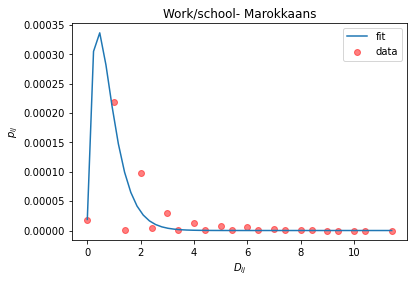

In [319]:
from scipy.optimize import curve_fit
df2 = df1.groupby(by='dij').mean().reset_index()


# df3 = df1[df1['dij'] != 0]
ydata =df1['pij']  
xdata = df1['dij']
x = np.linspace(0, max(xdata))
# plt.scatter(xdata,ydata)
# print(xdata)
 
print(max(df1['pij']))
p0 = [0,a,1e-3,0]
popt, pcov = curve_fit(prob_function, xdata, ydata, maxfev=5000,p0=p0, bounds=((0, 0, 0, 0), (np.inf, np.inf, np.inf, np.inf)))

# print(popt)

# print(df1)
# print(df2)
print(list(df2['pij']).index(max(df2['pij'])))
# print(list(df2['dij']).index(max(df2['pij'])))
plt.scatter(df2['dij'], df2['pij'], alpha=.5, c='r',  label="data" )
plt.plot(x, prob_function(x, popt[0], popt[1], popt[2], popt[3]), label = 'fit')
plt.title(f'Work/school- {group}')
plt.xlabel('$D_{ij}$')
plt.ylabel('$p_{ij}$')

print(popt[0])
plt.legend()
alpha, a, beta, b = popt

# plt.ylim(-0.001,0.001)
print(alpha, beta, a)
plt.show()

In [297]:
# residual sum of squares
ss_res = np.sum((ydata - prob_function(xdata, popt[0], popt[1], popt[2], popt[3])) ** 2)

# total sum of squares
ss_tot = np.sum((ydata - np.mean(ydata)) ** 2)

# r-squared
r2 = 1 - (ss_res / ss_tot)


r2

0.007893358072567525

In [356]:
def prob_function2(dist,etn_dist, age_dist, gender_dist, opl_dist):
#     print(dist)
    a,b,c,d = dist
#     print(age_dist, gender_dist, opl_dist, etn_dist)
    # Work/school
    alpha,a,b2 = [2.95464380e+00, 1.43612761e-04, 1.50487064e+00]
    # Family alpha, a, b2 = [1.51901678e+01, 1.95171705e-04, 1.32592328e+00]
    
    # Household
    alpha,a,b2 = [1.04633813e+01, 3.65648417e-05, 1.54797442e+00]
    
    
#     alpha, a, b = [2.60434666e+00, 6.65300420e-05, 9.06747890e-01]
    
#     alpha = 3.74706687e+00
    
    p_ij =a /( 1 + 1/b2*(   age_dist * b + gender_dist * c + opl_dist * d + etn_dist * a ) ** alpha)
    
 
    
    return p_ij

dij
[4.96461350e-04 9.99906838e-01 9.99941916e-01 1.00000351e+00] [[ 2.04195667e+10 -2.39324998e+07  1.32255475e+07 -5.77774431e+05]
 [-2.39324998e+07  3.40926594e+04 -1.92138107e+04  6.77080985e+02]
 [ 1.32255475e+07 -1.92138107e+04  1.08482038e+04 -3.74162005e+02]
 [-5.77774431e+05  6.77080985e+02 -3.74162005e+02  2.90512005e+01]]
[1.42897049e+05 1.84641976e+02 1.04154711e+02 5.38991656e+00]


<ipython-input-430-6614e6dc6c10>:28: RuntimeWarning: invalid value encountered in power
  p_ij =a /( 1 + 1/b2*(  opl_dist * d + etn_dist * a+ age_dist * b +gender_dist * c ) ** alpha)


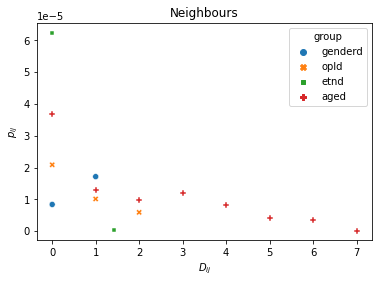

In [443]:
from scipy.optimize import curve_fit
df2 = df1.groupby(by='dij').mean().reset_index()


name = 'familie'

groups = ['_gender_d', '_opl_d', '_etn_d','_age_d']


import re

df = pd.DataFrame()
x_values = []
y_values = []
group = []
for g in groups:
    ydata =df1['pij']  
    data_a =  df1.groupby(by=name+g).mean().reset_index()
    xdata_a = data_a[name+g]
    ydata_a = data_a['pij']
    
    x_values.extend(list(xdata_a))
    y_values.extend(list(ydata_a))
    
    group.extend([re.sub('[^a-zA-Z]+', '', g)] * len(ydata_a))
    
df['dij'] = x_values
df['pij'] = y_values
df['group'] = group




# print(max

print('dij')

p0 = [0,0.00006,0.00001,0.00002]
sn.scatterplot(data = df, x='dij', y='pij', hue = 'group', style = 'group')

plt.title('Neighbours')
plt.xlabel('$D_{ij}$')
plt.ylabel('$p_{ij}$')

# huishouden_gender_d huishouden_age_d huishouden_etn_d huishouden_opl_d
xdata = [df1[name+'_opl_d'] ,  df1[name+'_age_d'],df1[name+'_etn_d'],df1[name+'_gender_d']]

xdata =  df2['dij_a'],df2['dij_g'] ,df2['dij_o'],df2['dij_e']
# print(xdata)
popt, pcov = curve_fit(prob_function2, xdata, df2['pij'], maxfev=5000, bounds=(-np.inf, np.inf))

print(popt,pcov)

perr = np.sqrt(np.diag(pcov))

print(perr)


       Unnamed: 0  werkschool_age_d  werkschool_gender_d  werkschool_opl_d  \
0               0               0.0                  0.0               0.0   
1               1               0.0                  0.0               1.0   
2               2               0.0                  0.0               2.0   
3               3               0.0                  0.0               0.0   
4               4               0.0                  0.0               1.0   
...           ...               ...                  ...               ...   
57595       57595               0.0                  0.0               1.0   
57596       57596               0.0                  0.0               0.0   
57597       57597               0.0                  0.0               2.0   
57598       57598               0.0                  0.0               1.0   
57599       57599               0.0                  0.0               0.0   

       werkschool_etn_d  werkschool_pij  huishouden_age_d  \
0 

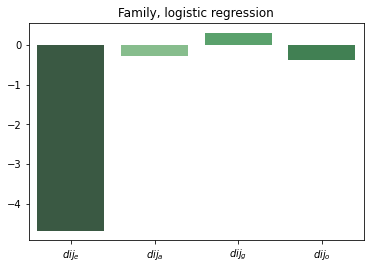

In [27]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
print(df1)
g = df1.groupby('pij_logistic')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

X = g[['dij_e', 'dij_a', 'dij_g', 'dij_o']]
pij = g['pij_logistic']

clf = LogisticRegression(penalty='none', solver="newton-cg")

clf.fit(X, pij)
# get importance
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

pal = sn.color_palette("Greens_d", len(importance))
rank = abs(importance).argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sn.barplot(x = [abs(x) for x in range(len(importance))], y = importance, palette=np.array(pal)[rank])


# pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('Family, logistic regression')
pyplot.xticks([0,1,2,3],['$dij_e$', '$dij_a$', '$dij_g$', '$dij_o$'] )
# sn.color_palette('Set2')
pyplot.show()

In [312]:
df1['pij_transformed'] = ((((df1['pij']/a)**-1) -1)**-alpha) * b


print(alpha,beta)

# df1['pij_transformed'] = - (lambertw(- (alpha*(df1['pij'] - a))/beta))/alpha

f = (alpha * df1['pij']) / (np.exp((a*alpha)/beta) * beta )

# df1['pij_transformed'] = - (lambertw(- (alpha*(df1['pij'] - a))/beta))/alpha

df1['pij_transformed'] = -(lambertw(-f) * beta + (alpha * a))/ (alpha * beta)

# df1[df1['pij_transformed'] == 0 ]

im = []
for i in df1['pij_transformed']:
    
    
    im.append(i.imag)

df1['complex'] = im



df1 = df1[df1['complex'] == 0]

print(df1['pij_transformed'])

df1.iloc[:,8:]

3.0710912549808627 0.0035713125452663218
0       -0.036965+0.000000j
1       -0.039941+0.000000j
2       -0.039941+0.000000j
3        0.050769-0.000000j
4        0.028533-0.000000j
                ...        
11515   -0.039941+0.000000j
11516   -0.039941+0.000000j
11517   -0.039941+0.000000j
11518   -0.039941+0.000000j
11519   -0.039941+0.000000j
Name: pij_transformed, Length: 11491, dtype: complex128


,huishouden_opl_d,huishouden_etn_d,huishouden_pij,familie_age_d,familie_gender_d,familie_opl_d,familie_etn_d,familie_pij,buren_age_d,buren_gender_d,...,buren_pij,dij_a,dij_g,dij_o,dij_e,pij,dij,pij_logistic,pij_transformed,complex
0,0.000000,1.414214,1.062811e-07,0.0,0.0,0.000000,1.414214,0.000012,0.0,0.0,...,0.000022,0.0,0.0,0.000000,1.414214,0.000012,1.414214,0.0,-0.036965+0.000000j,0.0
1,0.717439,1.014612,0.000000e+00,0.0,0.0,0.717439,1.014612,0.000000,0.0,0.0,...,0.000008,0.0,0.0,0.717439,1.014612,0.000000,1.732051,0.0,-0.039941+0.000000j,0.0
2,1.434878,1.014612,0.000000e+00,0.0,0.0,1.434878,1.014612,0.000000,0.0,0.0,...,0.000000,0.0,0.0,1.434878,1.014612,0.000000,2.449490,0.0,-0.039941+0.000000j,0.0
3,0.000000,0.000000,6.884277e-05,0.0,0.0,0.000000,0.000000,0.000277,0.0,0.0,...,0.000125,0.0,0.0,0.000000,0.000000,0.000277,0.000000,1.0,0.050769-0.000000j,-0.0
4,1.000000,0.000000,4.672918e-05,0.0,0.0,1.000000,0.000000,0.000224,0.0,0.0,...,0.000096,0.0,0.0,1.000000,0.000000,0.000224,1.000000,1.0,0.028533-0.000000j,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,0.717439,1.014612,0.000000e+00,0.0,0.0,0.717439,1.014612,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.717439,1.014612,0.000000,1.732051,0.0,-0.039941+0.000000j,0.0
11516,0.000000,1.414214,0.000000e+00,0.0,0.0,0.000000,1.414214,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,1.414214,0.000000,1.414214,0.0,-0.039941+0.000000j,0.0
11517,1.434878,1.014612,0.000000e+00,0.0,0.0,1.434878,1.014612,0.000000,0.0,0.0,...,0.000000,0.0,0.0,1.434878,1.014612,0.000000,2.449490,0.0,-0.039941+0.000000j,0.0
11518,0.717439,1.014612,0.000000e+00,0.0,0.0,0.717439,1.014612,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.717439,1.014612,0.000000,1.732051,0.0,-0.039941+0.000000j,0.0


In [313]:


s = pd.Series(df1['pij_transformed'], dtype="Float64")
dtype="Float64"
df1['pij_transformed'] = s

C:\Users\KGulp\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:995: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
<ipython-input-313-b1ed9e380f95>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pij_transformed'] = s


3.0710912549808627 0.00014264042667112714 0.0035713125452663218 1e-10
Feature: 0, Score: -0.02424
Feature: 1, Score: -0.00072
Feature: 2, Score: -0.00204
Feature: 3, Score: -0.00408


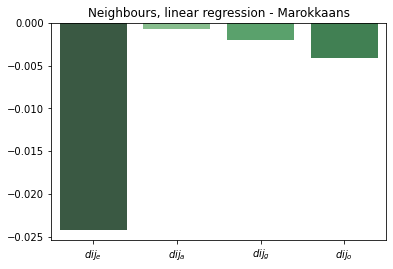

In [315]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset

alpha, a, b, beta = popt

print(alpha, a, b, beta)
pij = df1['pij']
pij = df1['pij_transformed']


X = df1[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]

reg = LinearRegression().fit(X, pij)

# get importance
importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pal = sn.color_palette("Greens_d", len(importance))
rank = abs(importance).argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sn.barplot(x = [abs(x) for x in range(len(importance))], y = importance, palette=np.array(pal)[rank])


# pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title(f'Neighbours, linear regression - {group}')
pyplot.xticks([0,1,2,3],['$dij_e$', '$dij_a$', '$dij_g$', '$dij_o$'] )
# sn.color_palette('Set2')
pyplot.show()

In [377]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# X = g[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]
# pij = g['pij_logistic']

# print(df1.size)
train = df1.head(int(0.66 * df1.size))
test = df1.tail(int(0.33 * df1.size))


g = train.groupby('pij_logistic')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

X_train = train[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]
y_train = train['pij_logistic']

clf = LogisticRegression(penalty='none', solver="newton-cg")
# clf = RandomForestClassifier()


X_test = test[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]
y_test = test['pij_logistic']


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(tn, fn, tp, fp)
# print(y_pred)

# list(y_pred).count(1)

0.9922916666666667
[[57156     0]
 [  444     0]]
57156 444 0 0


Text(0.5, 0, '$p_{ij}$')

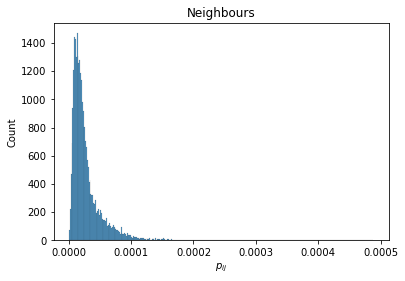

In [797]:
sn.histplot(df1['pij'])
plt.title('Neighbours')
# plt.xlabel('$D_{ij}$')
plt.xlabel('$p_{ij}$')

In [295]:
l = [
3097117      
,2640717 
,940588
,958249
,406772
]

i = 0
a = 0
for x in l:
    i += 1
    print(x/sum(l) * (861000/i))
    
    a += x/sum(l) * (861000/i)
    
print(a)

331526.9017260395
141336.07567058038
33561.34381756668
25643.63261478946
8708.47700418838
540776.4308331644
